# 匯入函式庫

In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.dates import date2num

# 匯入資料

In [2]:
data = pd.read_excel('./CAD_AUD_GBP.xlsx', index_col=0, skiprows=3)
data = data.iloc[1:,:]
data.head(15)

,CADUSD Curncy,AUDUSD Curncy,GBPUSD Curncy
1981-01-01 00:00:00,0.8372,1.1814,2.389
1981-01-02 00:00:00,0.837,1.1802,2.382
1981-01-05 00:00:00,0.8413,1.1847,2.4155
1981-01-06 00:00:00,0.8416,1.189,2.4225
1981-01-07 00:00:00,0.8418,1.189,2.4115
1981-01-08 00:00:00,0.8418,1.1865,2.4035
1981-01-09 00:00:00,0.8415,1.1852,2.395
1981-01-12 00:00:00,0.8408,1.18,2.397
1981-01-13 00:00:00,0.8401,1.1793,2.388
1981-01-14 00:00:00,0.8397,1.1808,2.4025


In [3]:
data = data.astype('float64')
data.index = pd.to_datetime(data.index)

In [25]:
data.head()

,CADUSD Curncy,AUDUSD Curncy,GBPUSD Curncy
1981-01-01,0.8372,1.1814,2.3890
1981-01-02,0.8370,1.1802,2.3820
1981-01-05,0.8413,1.1847,2.4155
1981-01-06,0.8416,1.1890,2.4225
1981-01-07,0.8418,1.1890,2.4115


In [36]:
def forex_draw(forex_name, data):
    if forex_name == 'cad':
        col = 0
    elif forex_name == 'aud':
        col = 1
    elif forex_name == 'gbp':
        col = 2
    else:
        return 'forex_name is not available.'

    forex = data.iloc[:,col]
    forex_train = forex.loc['1981-01-01':'2008-12-31']
    time_train = forex.loc['1981-01-01':'2008-12-31'].index
    forex_valid = forex.loc['2009-01-01':'2016-12-31']
    time_valid = forex.loc['2009-01-01':'2016-12-31'].index
    forex_test = forex.loc['2017-01-01':'2020-12-31']
    time_test = forex.loc['2017-01-01':'2020-12-31'].index

    plt.plot(time_train, forex_train)
    plt.plot(time_valid, forex_valid)
    plt.plot(time_test, forex_test)
    
    plt.xlim(date2num(data.index.min()), date2num(data.index.max()))

    plt.show()

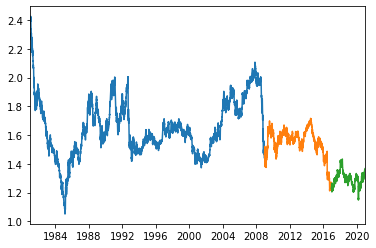

In [39]:
forex_draw('cad', data)

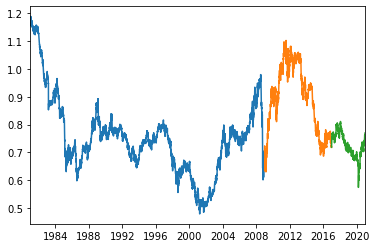

In [40]:
forex_draw('aud', data)

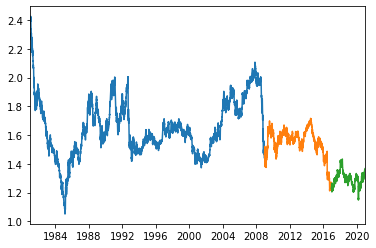

In [41]:
forex_draw('gbp', data)

# diff_log

In [6]:
log_data = np.log(data)

In [7]:
log_data.head()

,CADUSD Curncy,AUDUSD Curncy,GBPUSD Curncy
1981-01-01,-0.177692,0.166700,0.870875
1981-01-02,-0.177931,0.165684,0.867940
1981-01-05,-0.172807,0.169490,0.881906
1981-01-06,-0.172450,0.173113,0.884800
1981-01-07,-0.172213,0.173113,0.880249


In [8]:
diff_log_data = log_data.diff().dropna()

In [9]:
diff_log_data.head()

,CADUSD Curncy,AUDUSD Curncy,GBPUSD Curncy
1981-01-02,-0.000239,-0.001016,-0.002934
1981-01-05,0.005124,0.003806,0.013966
1981-01-06,0.000357,0.003623,0.002894
1981-01-07,0.000238,0.000000,-0.004551
1981-01-08,0.000000,-0.002105,-0.003323


In [10]:
diff_log_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10435 entries, 1981-01-02 to 2020-12-31
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   CADUSD Curncy  10435 non-null  float64
 1   AUDUSD Curncy  10435 non-null  float64
 2   GBPUSD Curncy  10435 non-null  float64
dtypes: float64(3)
memory usage: 326.1 KB


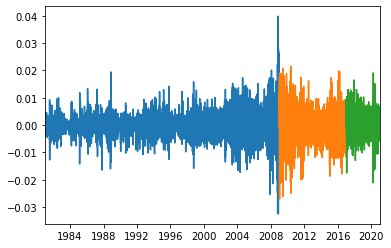

In [42]:
forex_draw('cad', diff_log_data)

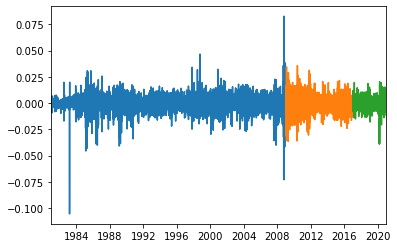

In [43]:
forex_draw('aud', diff_log_data)

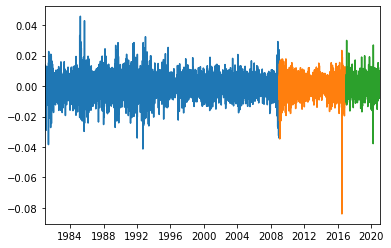

In [44]:
forex_draw('gbp', diff_log_data)